In [13]:
!pip install tensorflow_hub
!pip install tensorflow_datasets
!pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix



In [58]:

train_df = pd.read_csv("movie_review_train.csv")
test_df = pd.read_csv("movie_review_test.csv")

In [60]:
print(train_df.head())
print(train_df.columns)

  class                                               text
0   Pos   a common complaint amongst film critics is   ...
1   Pos   whew   this film oozes energy   the kind of b...
2   Pos   steven spielberg s   amistad     which is bas...
3   Pos   he has spent his entire life in an awful litt...
4   Pos   being that it is a foreign language film with...
Index(['class', 'text'], dtype='object')


In [62]:
# Text and labels
X_train_text = train_df['text'].astype(str)
y_train = train_df['class']
X_test_text = test_df['text'].astype(str)
y_test = test_df['class']


In [64]:
# Encode text to sequences
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

# Pad sequences
max_length = 100
X_train = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [65]:
model = Sequential([
    Input(shape=(max_length,)),
    Embedding(input_dim=10000, output_dim=16),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [68]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,153 (629.50 KB)

 Trainable params: 161,153 (629.50 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
X_train = np.array(X_train, dtype='int32')
X_test = np.array(X_test, dtype='int32')


In [74]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [76]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [78]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5158 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6920
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6652 - loss: 0.6889 - val_accuracy: 0.6250 - val_loss: 0.6842
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7749 - loss: 0.6642 - val_accuracy: 0.7175 - val_loss: 0.6545
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8642 - loss: 0.5839 - val_accuracy: 0.7350 - val_loss: 0.5998
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9090 - loss: 0.4459 - val_accuracy: 0.7450 - val_loss: 0.5558
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9385 - loss: 0.3194 - val_accuracy: 0.7525 - val_loss: 0.5214
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9522 - loss: 0.2395 - val_accuracy: 0.7725 - val_loss: 0.4993
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9728 - loss: 0.1585 - val_accuracy: 0.7650 - val_loss

In [80]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7285 - loss: 0.7026 
Test Accuracy: 0.74


In [82]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {accuracy:.2f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0015
Train Accuracy: 1.00


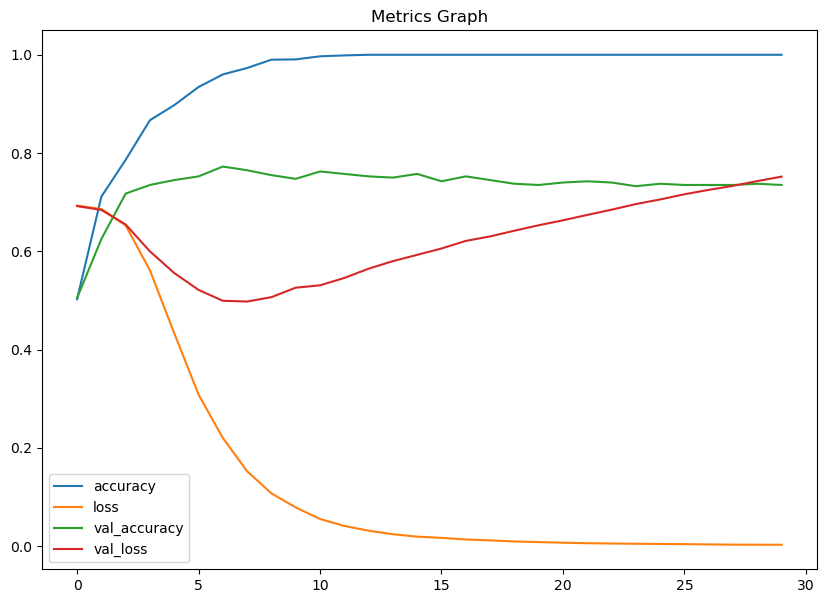

In [84]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [86]:
# Get predicted probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype('int32')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [88]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       200
         1.0       0.73      0.74      0.74       200

    accuracy                           0.73       400
   macro avg       0.74      0.73      0.73       400
weighted avg       0.74      0.73      0.73       400



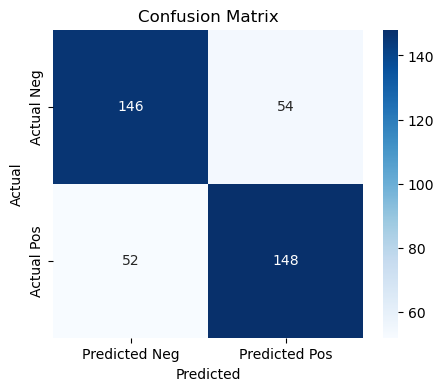

In [90]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Neg', 'Predicted Pos'], yticklabels=['Actual Neg', 'Actual Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [92]:
sample = [" films adapted from comic books have had plenty of success   whether they re about superheroes   batman   superman   spawn     or geared toward kids   casper   or the arthouse crowd   ghost world     but there s never really been a comic book like from hell before    for starters   it was created by alan moore   and eddie campbell     who brought the medium to a whole new level in the mid  80s with a 12 part series called the watchmen    to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd    the book   or   graphic novel     if you will   is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes    in other words   don t dismiss this film because of its source    if you can get past the whole comic book thing   you might find another stumbling block in from hell s directors   albert and allen hughes    getting the hughes brothers to direct this seems almost as ludicrous as casting carrot top in   well   anything   but riddle me this   who better to direct a film that s set in the ghetto and features really violent street crime than the mad geniuses behind menace ii society    the ghetto in question is   of course   whitechapel in 1888 london s east end    it s a filthy   sooty place where the whores   called   unfortunates     are starting to get a little nervous about this mysterious psychopath who has been carving through their profession with surgical precision    when the first stiff turns up   copper peter godley   robbie coltrane   the world is not enough   calls in inspector frederick abberline   johnny depp   blow   to crack the case    abberline   a widower   has prophetic dreams he unsuccessfully tries to quell with copious amounts of absinthe and opium    upon arriving in whitechapel   he befriends an unfortunate named mary kelly   heather graham   say it isn t so   and proceeds to investigate the horribly gruesome crimes that even the police surgeon can t stomach    i don t think anyone needs to be briefed on jack the ripper   so i won t go into the particulars here   other than to say moore and campbell have a unique and interesting theory about both the identity of the killer and the reasons he chooses to slay    in the comic   they don t bother cloaking the identity of the ripper   but screenwriters terry hayes   vertical limit   and rafael yglesias   les mis   rables   do a good job of keeping him hidden from viewers until the very end    it s funny to watch the locals blindly point the finger of blame at jews and indians because   after all   an englishman could never be capable of committing such ghastly acts    and from hell s ending had me whistling the stonecutters song from the simpsons for days     who holds back the electric car/who made steve guttenberg a star          don t worry   it ll all make sense when you see it    now onto from hell s appearance   it s certainly dark and bleak enough   and it s surprising to see how much more it looks like a tim burton film than planet of the apes did   at times   it seems like sleepy hollow 2      the print i saw wasn t completely finished   both color and music had not been finalized   so no comments about marilyn manson     but cinematographer peter deming   don t say a word   ably captures the dreariness of victorian era london and helped make the flashy killing scenes remind me of the crazy flashbacks in twin peaks   even though the violence in the film pales in comparison to that in the black and white comic    oscar winner martin childs    shakespeare in love   production design turns the original prague surroundings into one creepy place    even the acting in from hell is solid   with the dreamy depp turning in a typically strong performance and deftly handling a british accent    ians holm   joe gould s secret   and richardson   102 dalmatians   log in great supporting roles   but the big surprise here is graham    i cringed the first time she opened her mouth   imagining her attempt at an irish accent   but it actually wasn t half bad    the film   however   is all good    2   00   r for strong violence/gore   sexuality   language and drug content  ."]
sample_seq = tokenizer.texts_to_sequences(sample)
sample_pad = pad_sequences(sample_seq, maxlen=max_length, padding='post')
prediction = model.predict(sample_pad)
print("Positive" if prediction[0][0] > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Positive


In [94]:
sample = ["  i never understood what the clich     hell on earth   truly meant until very recently    i ve just never experienced anything in my life which was so terrifying   so horrible   so monstrously deplorable that it justified being termed as   hell on earth      after all   i ve never been to war   i ve never been the victim of any violent crime   i ve never really been broken hearted   and i ve never been audited   so i really had no frame of reference as to people meant when they said that something was   hell on earth    then i saw cruel intentions    in a perfect world   i would be in charge of all the movie studios    the very first thing i d do in this perfect world   would be to take every hollywood producer who thinks that setting any story in contemporary america with a 20 something cast playing teenagers and featuring a soundtrack ripped directly from mtv   and throw them in jail    but it wouldn t just be your average jail   not even a maximum security installation    i d have these producers   and everyone else involved in the production of these films   put in front of a war crimes tribunal and forced to beg for mercy for their crimes against humanity    now you re probably thinking to yourself     is this really how bad cruel intentions is      the answer is no    it s actually much worse    watching the cast of this motion picture atrocity try to act their way through roger kumble s awfully written script is probably a lot like stabbing yourself in the arm with a chainsaw and then pouring salt on the open wound    and then pouring acid on the salt    i don t know if kumble was trying to evoke comedy or tragedy out of his opening scene where marci greenbaum   tara reid   whines about having nude photos of her posted on the internet   but the only emotion i felt was sheer boredom    from that opening scene   where boring actor ryan phillippe tries to seduce tv actress swoosie kurtz   to the conclusion which i don t remember because i had practically fallen asleep   cruel intentions is truly   hell on earth     right up there with war and tax audits    "]
sample_seq = tokenizer.texts_to_sequences(sample)
sample_pad = pad_sequences(sample_seq, maxlen=max_length, padding='post')
prediction = model.predict(sample_pad)
print("Positive" if prediction[0][0] > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Negative


In [96]:

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Tokenization
vocab_size = 10000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')
    

In [98]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)
    

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.5136 - loss: 0.6931 - val_accuracy: 0.5200 - val_loss: 0.6922
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7227 - loss: 0.6517 - val_accuracy: 0.6075 - val_loss: 0.6896
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9100 - loss: 0.2605 - val_accuracy: 0.6550 - val_loss: 0.7879
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9830 - loss: 0.0704 - val_accuracy: 0.6150 - val_loss: 1.6769
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9660 - loss: 0.0961 - val_accuracy: 0.6450 - val_loss: 1.1751
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9986 - loss: 0.0108 - val_accuracy: 0.6475 - val_loss: 1.3345
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.6675 - val_loss: 1.4182
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 1.0000 - loss: 9.7652e-04 - val_accuracy: 0.6550

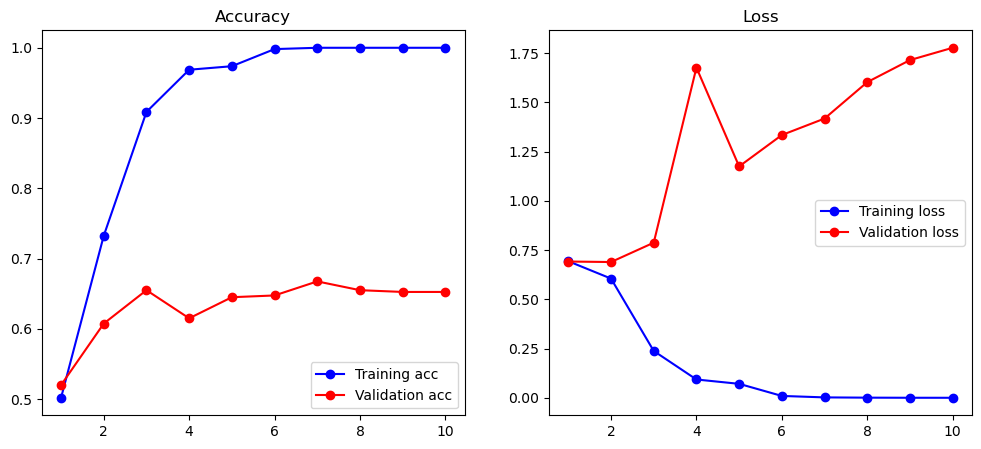

In [99]:

import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_history(history)
    

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
              precision    recall  f1-score   support

         0.0       0.64      0.69      0.67       200
         1.0       0.67      0.61      0.64       200

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400



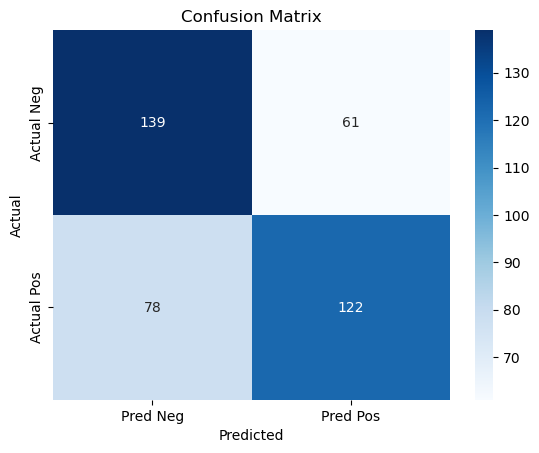

In [100]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_probs = model.predict(X_test_pad)
y_pred = (y_pred_probs > 0.5).astype('int32')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred Neg', 'Pred Pos'],
            yticklabels=['Actual Neg', 'Actual Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
    

In [101]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100, 128)            │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,143,109 (8.18 MB)

 Trainable params: 714,369 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,428,740 (5.45 MB)

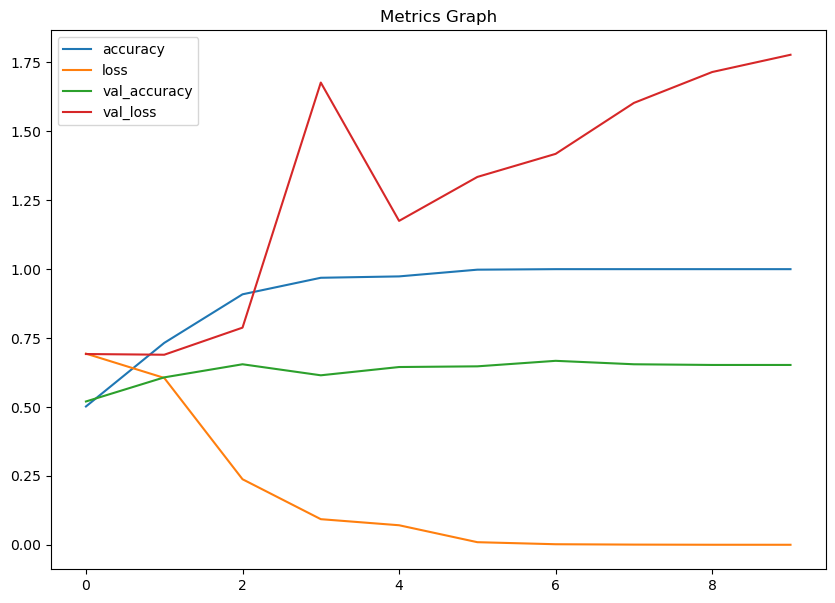

In [102]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()